In [5]:
#Import dataset and libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Dataset Preparation

In [2]:
#loading the dataset
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)

#dataset cleaning
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Aromas', axis=1)
wine_dataframe = wine_dataframe.drop('Olphactive', axis=1)

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)
df_concatenated = wine_dataframe

In [3]:
#remove the observations for which all continuous values are missing
mask = (df_concatenated['Léger to Puissant'] != 0) | (df_concatenated['Souple to Tannique'] != 0) | (df_concatenated['Sec to Moelleux'] != 0) | (df_concatenated['Doux to Acide'] != 0)
df_concatenated = df_concatenated[mask]

# Datset Split

In [6]:
#Split the varieties and the parameters
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']

#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

# Prediction

In [7]:
#Selection of model parameters
classifier = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')

#Train the model on train dataset
classifier.fit(X_train, y_train)

#Predict varieties of test dataset
y_pred = classifier.predict(X_test)

#Print the results
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

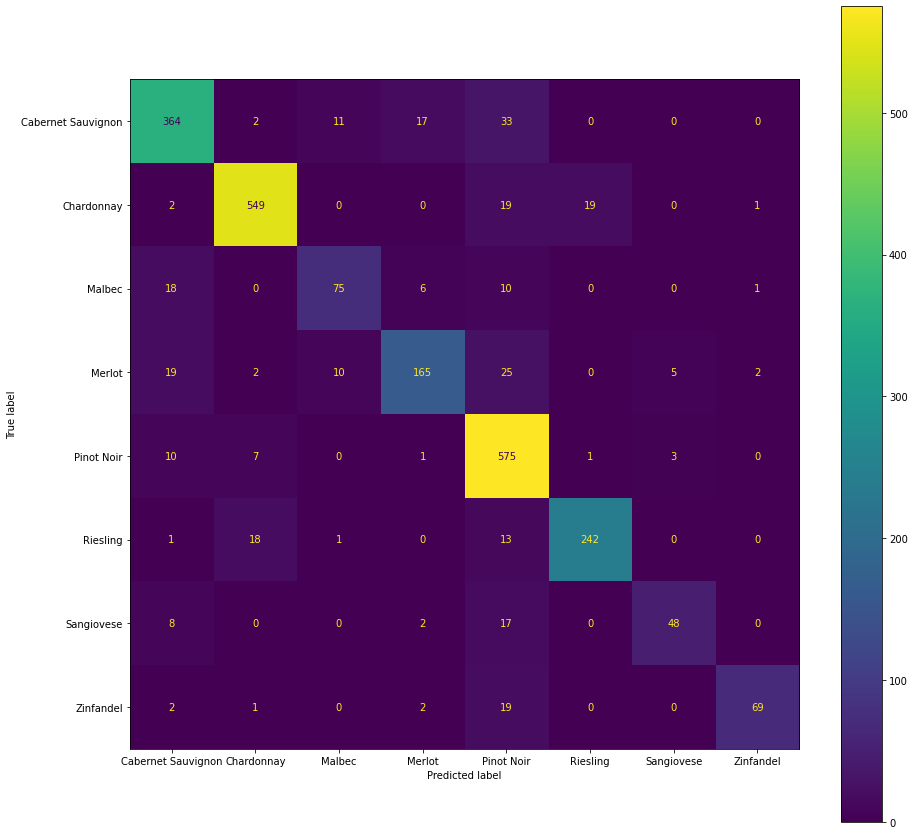

In [10]:
#Creation of a confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Cabernet Sauvignon" ,"Chardonnay", "Malbec","Merlot","Pinot Noir","Riesling","Sangiovese","Zinfandel"])
cm_display.plot(ax=ax)
plt.savefig('wine_confusion_continuous_matrix.png', dpi=300)
plt.show()


# GridSearch

In [27]:
#Optimize model parameters
svm_model = SVC()
param_grid = {'C': [1, 10, 50, 100, 150], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['auto', 'scale']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [29]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9563427650200443
